# Comparing Clustering Algorithm Effectiveness

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---

### 1) Load the data sets.

Each of the seven data sets have three columns:

    x
    y
    label
    
Because they each only have two variables, they're easy to examine visually. You’ll compare the “true” labels for the data to the clusters the algorithms find.

In [2]:
flame = pd.read_csv('./datasets/flame.csv')
agg = pd.read_csv('./datasets/aggregation.csv')
comp = pd.read_csv('./datasets/compound.csv')
jain = pd.read_csv('./datasets/jain.csv')
path = pd.read_csv('./datasets/pathbased.csv')
r15 = pd.read_csv('./datasets/r15.csv')
spiral = pd.read_csv('./datasets/spiral.csv')

---

### 2) Plot each of the data sets with colored true labels.

The data sets have different numbers of unique labels, so you'll need to figure out how many there are for each and color the clusters accordingly (for example, `r15` has 15 different clusters).

In [3]:
spiral.head()

,x,y,label
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [4]:
spiral['label'].unique()

array([3, 1, 2])

In [5]:
plt.cm.Spectral(np.linspace(0, 1, len(spiral.label.unique())))

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99807766, 0.99923106, 0.74602076, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

In [6]:
def plot_clusters(df, title):
    fig, ax = plt.subplots(figsize=(5,5))

    colors = plt.cm.Spectral(np.linspace(0, 1, len(df.label.unique())))
   
    for label, color in zip(df.label.unique(), colors):
        X = df[df.label == label]
        ax.scatter(X.iloc[:,0], X.iloc[:,1], s=70, 
                   color=color, label=label, alpha=0.9)
        
    ax.set_title(title, fontsize=20)
    ax.legend(loc='lower right')
    
    plt.show()

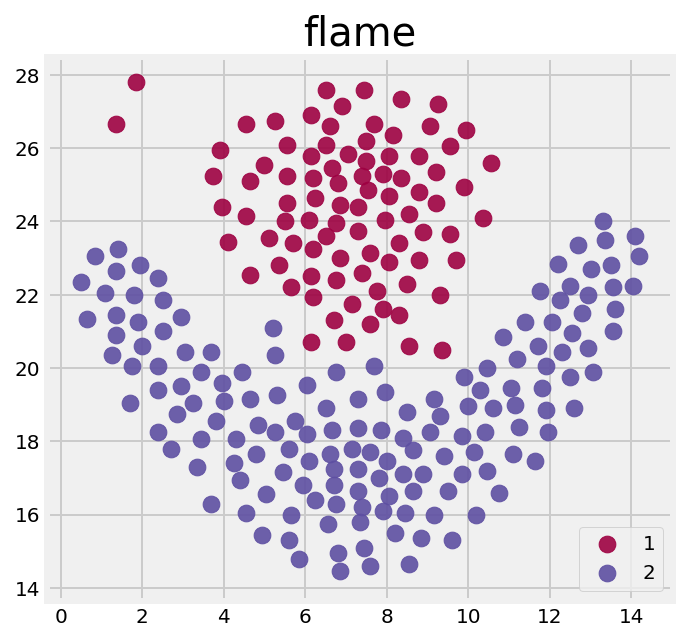

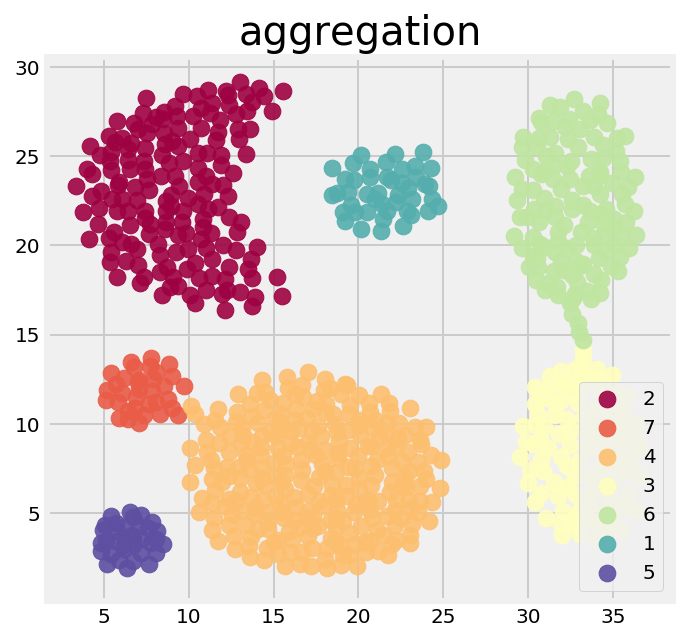

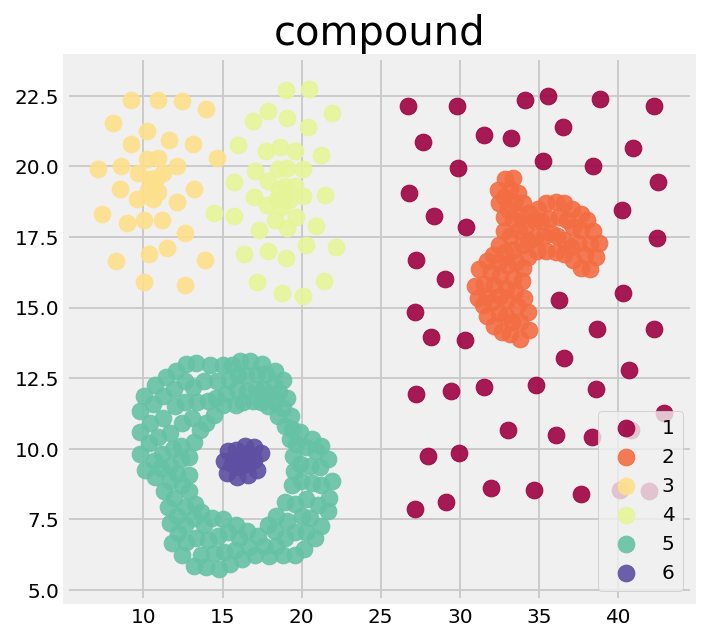

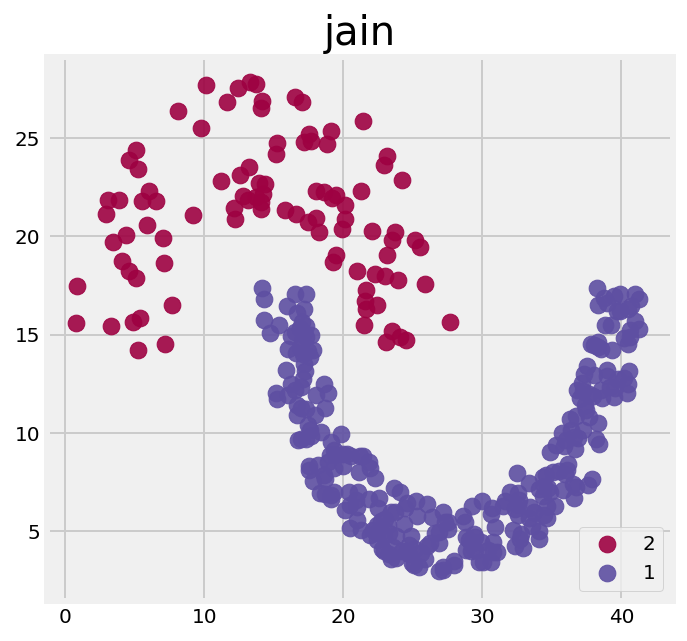

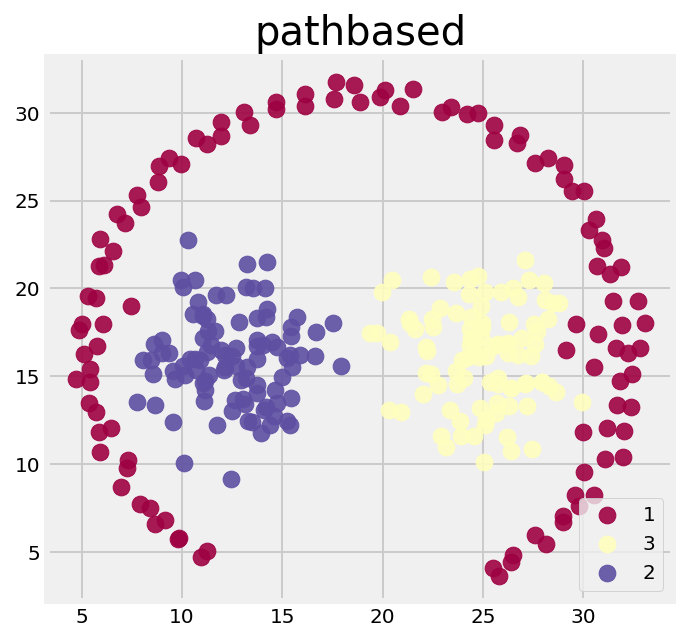

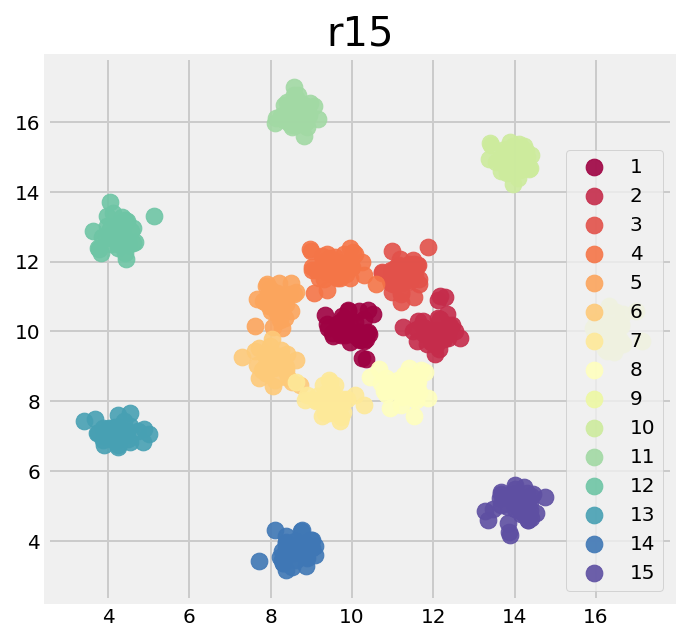

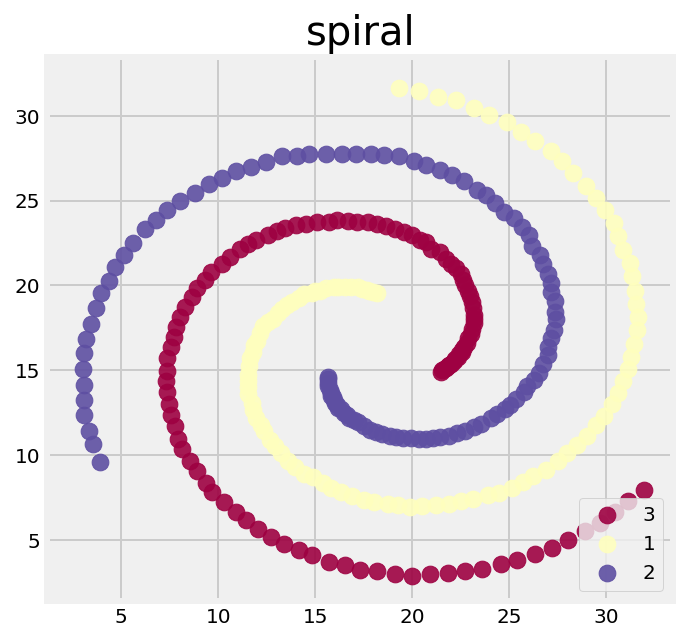

In [7]:
datasets = [
    ('flame', flame), 
    ('aggregation', agg),
    ('compound', comp),
    ('jain', jain),
    ('pathbased', path),
    ('r15', r15),
    ('spiral', spiral)
]

for title, df in datasets:
    plot_clusters(df, title)

---

### 3) Write a plotting function (or functions) to compare the performance of the three clustering algorithms.

Load in the three clustering algorithms we covered earlier in the class.

    K-means: k-means clustering.
    Agglomerative clustering: hierarchical clustering (bottom up).
    DBSCAN: density-based clustering.
    
Your function(s) should allow you to visually examine the effects of changing different parameters in the clustering algorithms. The parameters you should explore, at minimum, are:

    K-means:
        n_clusters
    Agglomerative clustering:
        n_clusters
    DBSCAN
        eps
        min_samples
        
Feel free to explore other parameters for these models.


In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [9]:
set([1,3,4,5,6,7,7,7,7,7,2,2,2,2,1,1,1,1])

{1, 2, 3, 4, 5, 6, 7}

This function is running fine.


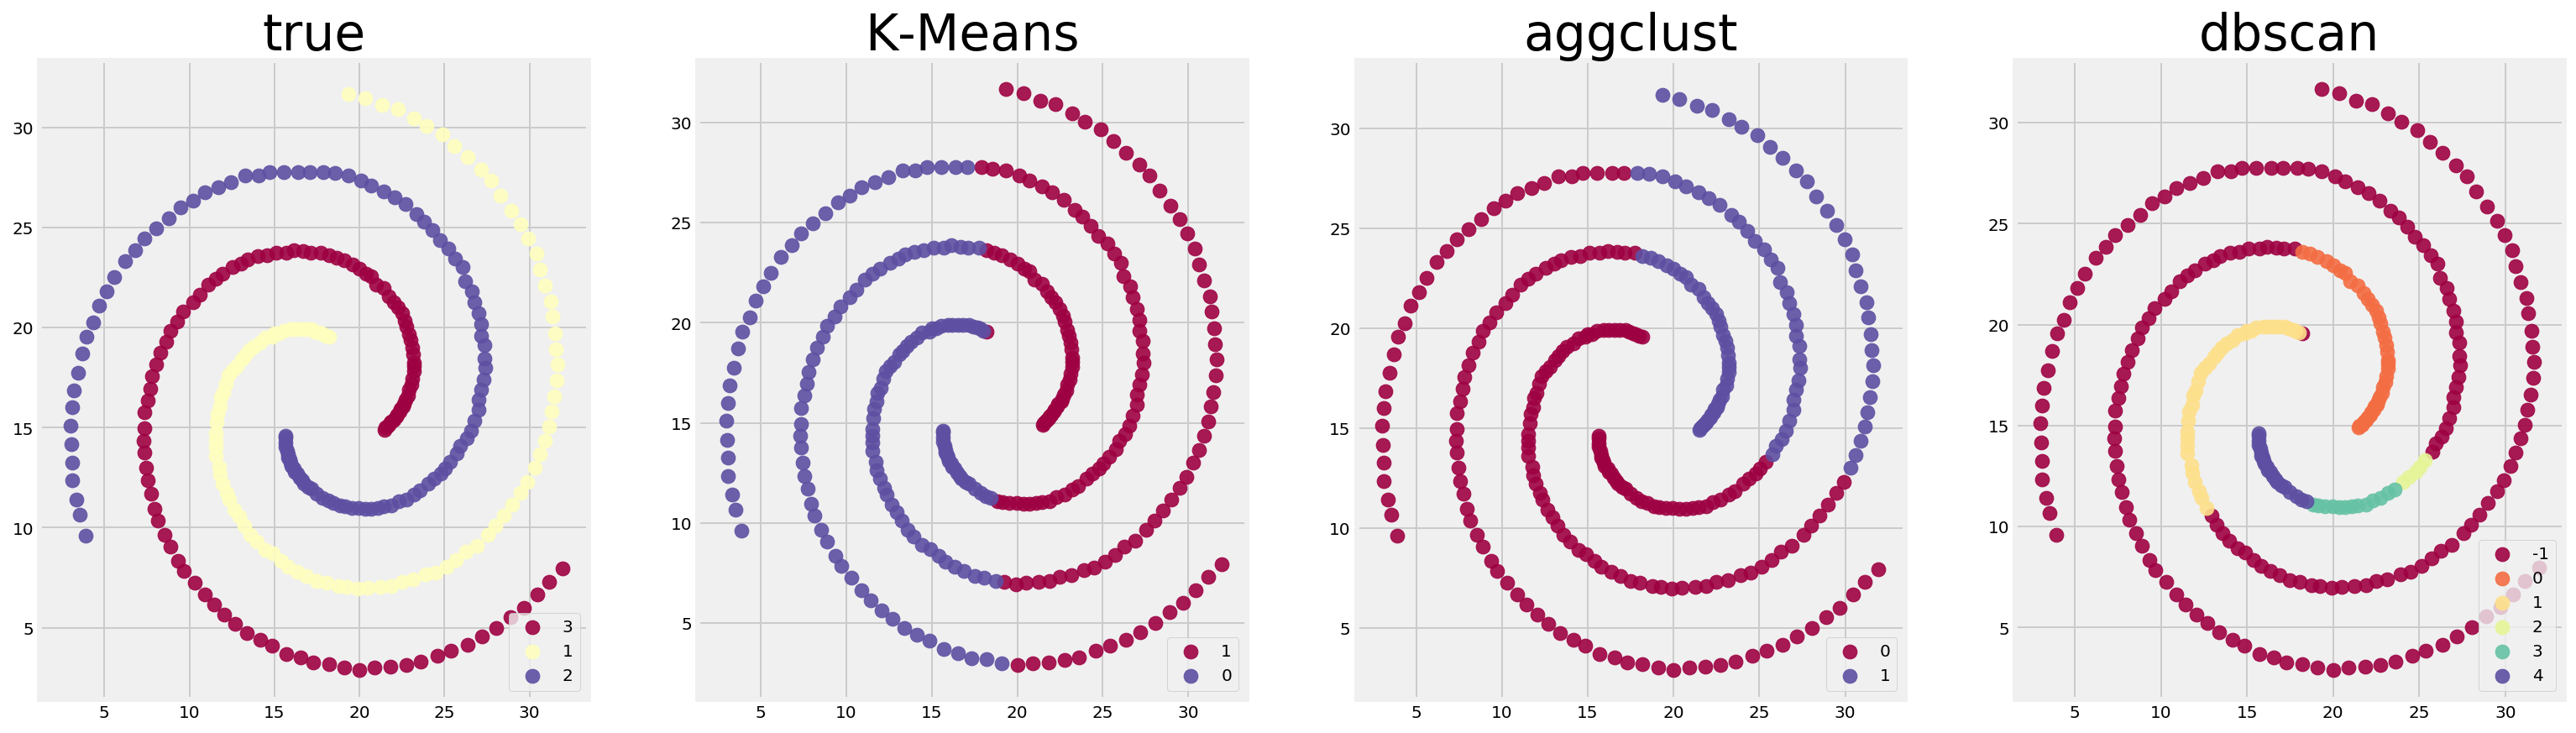

In [10]:
def compare_clusters(df,
                    n_clusters_kmeans  = 3,
                    n_clusters_agg     = 3,
                    eps_dbscan         = 3,
                    min_samples_dbscan = 3,
                    random_state       = 42
                    ):
    
    fig, axarr = plt.subplots(nrows = 1, ncols = 4, figsize=(24, 7))
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(df['label'].unique())))
    
    for label, color in zip(df['label'].unique(), colors):
        X_ = df[df['label'] == label]
        axarr[0].scatter(X_.iloc[:, 0], X_.iloc[:, 1], s = 70,
                        color = color, label = label, alpha = .9)
    axarr[0].set_title("true", fontsize=30)
    axarr[0].legend(loc="lower right")
    
    print("This function is running fine.")

    X = df.iloc[:, [0, 1]]
    
    kmeans = KMeans(n_clusters = n_clusters_kmeans, random_state = random_state)
    kmeans.fit(X)
    
    X['kmeans_label'] = kmeans.labels_
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(X['kmeans_label'].unique())))
    
    for label, color in zip(X['kmeans_label'].unique(), colors):
        
        X_ = X[X['kmeans_label'] == label]
        axarr[1].scatter(X_.iloc[:, 0], X_.iloc[:, 1], s = 70,
                        color = color, label = label, alpha = .9)
    
    axarr[1].set_title("K-Means", fontsize=30)
    axarr[1].legend(loc = "lower right")
    
    aggclust = AgglomerativeClustering(n_clusters = n_clusters_agg)
    aggclust.fit(X)
    
    X['aggclust_label'] = aggclust.labels_
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(X['aggclust_label'].unique())))
    
    for label, color in zip(X['aggclust_label'].unique(), colors):
        
        X_ = X[X['aggclust_label'] == label]
        axarr[2].scatter(X_.iloc[:, 0], X_.iloc[:, 1], s = 70,
                        color = color, label = label, alpha = .9)
    
    axarr[2].set_title("aggclust", fontsize=30)
    axarr[2].legend(loc = "lower right")
    
    dbscan = DBSCAN(eps = eps_dbscan, min_samples = min_samples_dbscan)
    dbscan.fit(X)
    
    X['dbscan_label'] = dbscan.labels_
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(X['dbscan_label'].unique())))
    
    for label, color in zip(X['dbscan_label'].unique(), colors):
        
        X_ = X[X['dbscan_label'] == label]
        axarr[3].scatter(X_.iloc[:, 0], X_.iloc[:, 1], s = 70,
                        color = color, label = label, alpha = .9)
    
    axarr[3].set_title("dbscan", fontsize=30)
    axarr[3].legend(loc = "lower right")
    
compare_clusters(
    spiral,
    n_clusters_kmeans = 2,
    n_clusters_agg = 2,
    eps_dbscan = 1,
    min_samples_dbscan = 5
)

### 4) Tinkering with clustering parameters.

In the following sections, look at how the parameters affect the clustering algorithms and try to get clusters that make sense. There is no right answer here, as these are unsupervised techniques.

---

### 4.A) Find good parameters for the `flame` data set.

Which algorithm (visually) performs best?

This function is running fine.


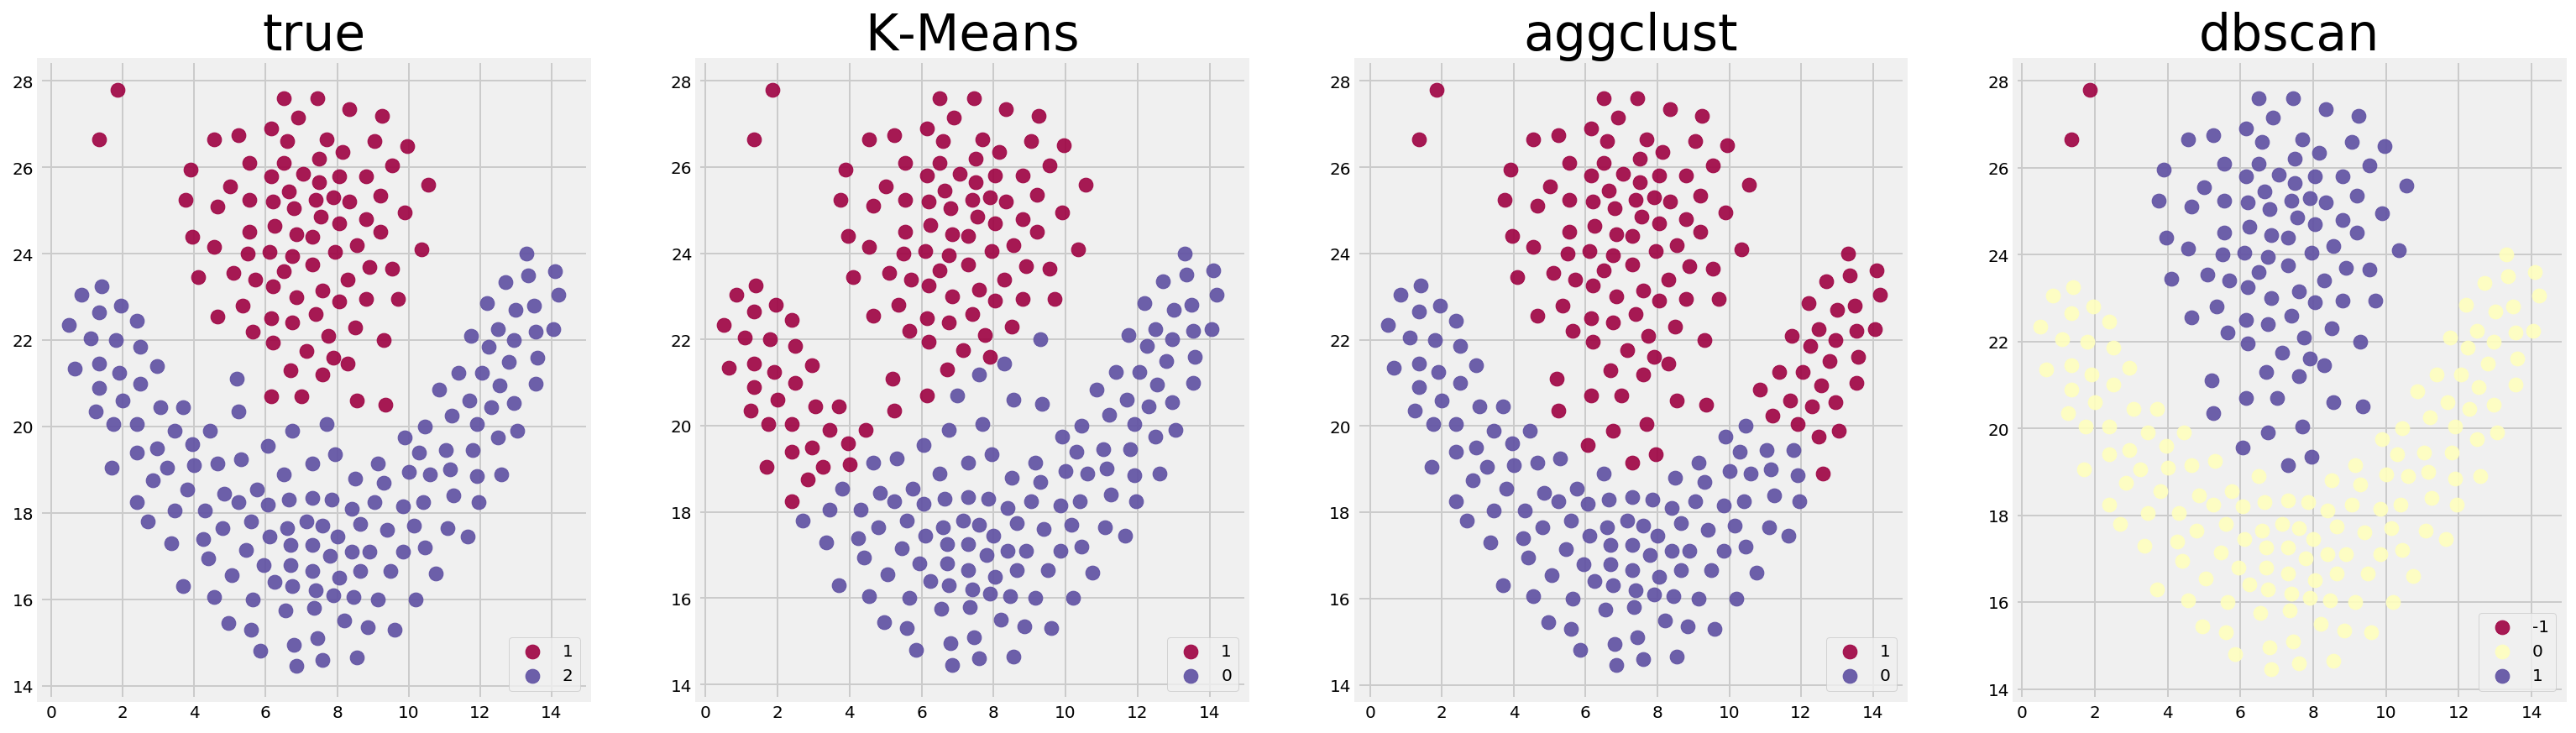

In [11]:
compare_clusters(
    flame,
    n_clusters_kmeans = 2,
    n_clusters_agg = 2,
    eps_dbscan = 1.2,
    min_samples_dbscan = 4
)

---

### 4.B) Find good parameters for the `agg` data set.

Which algorithm (visually) performs best?

This function is running fine.


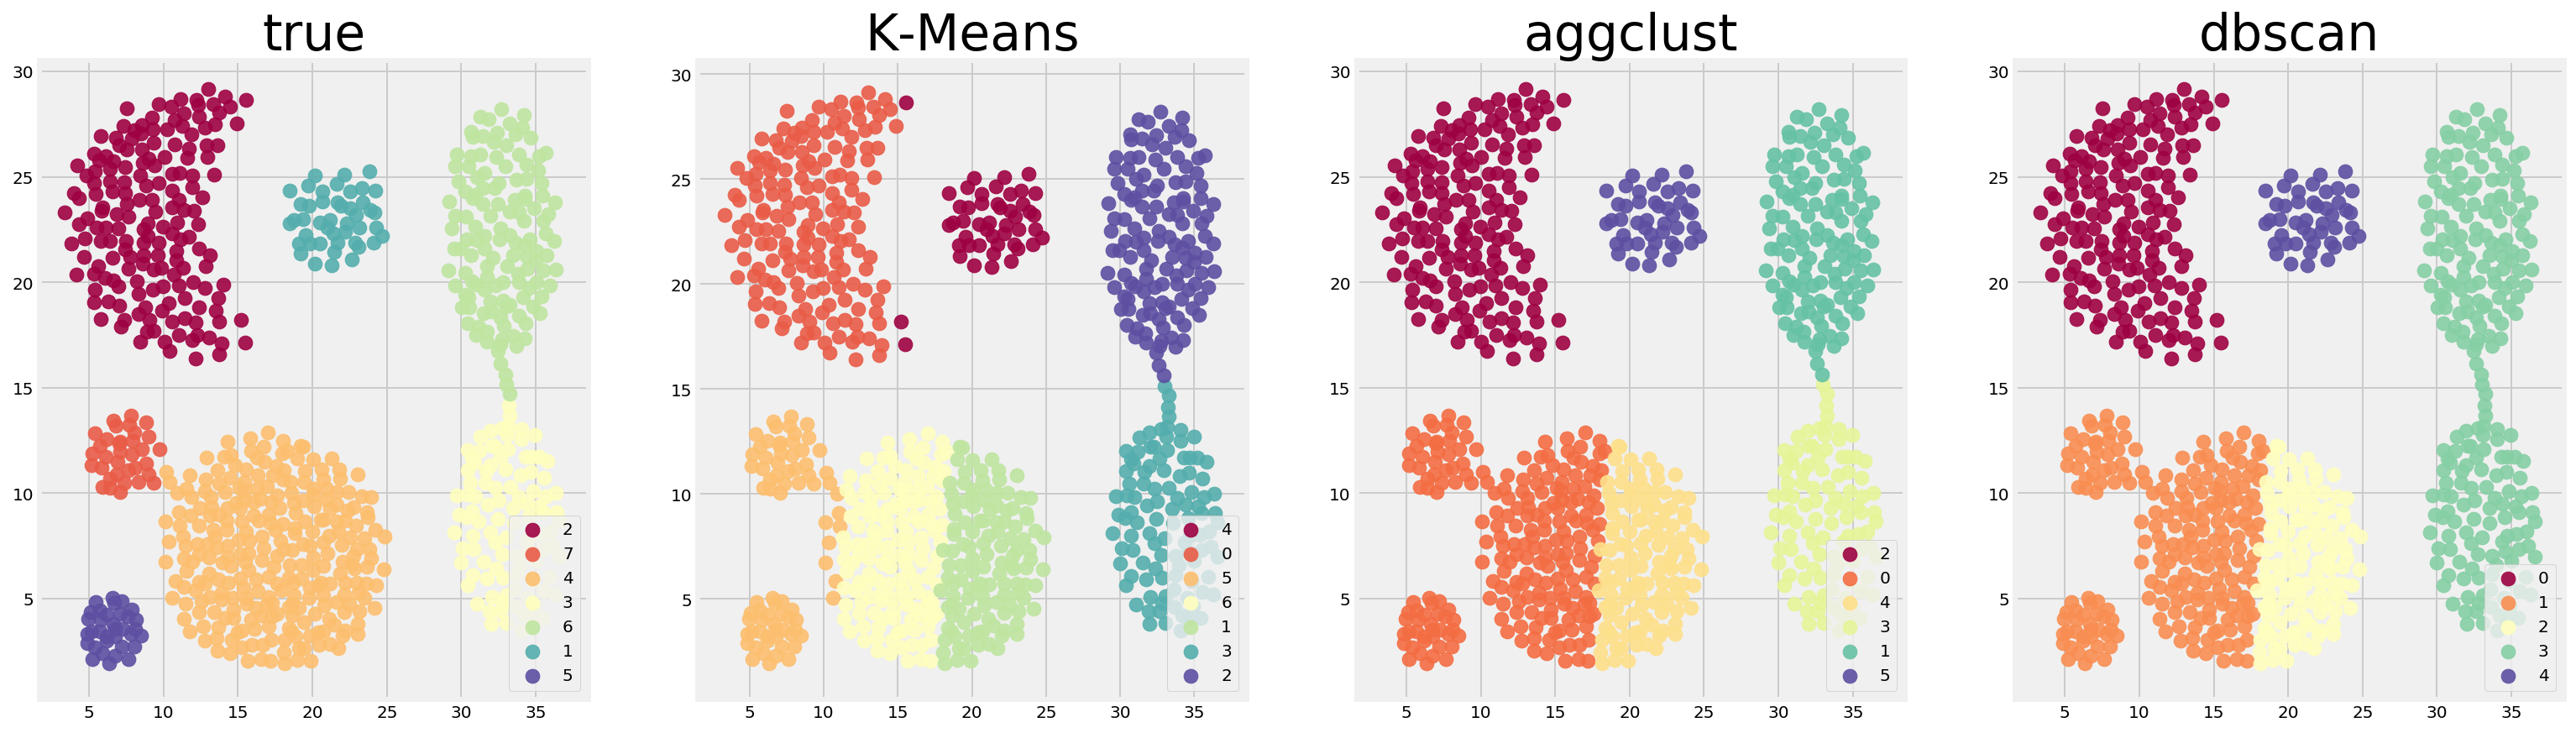

In [12]:
compare_clusters(
    agg,
    n_clusters_kmeans = 7,
    n_clusters_agg = 6,
    eps_dbscan = 4.8,
    min_samples_dbscan = 15
)

---

### 4.C) Find good parameters for the `comp` data set.

Which algorithm (visually) performs best?

This function is running fine.


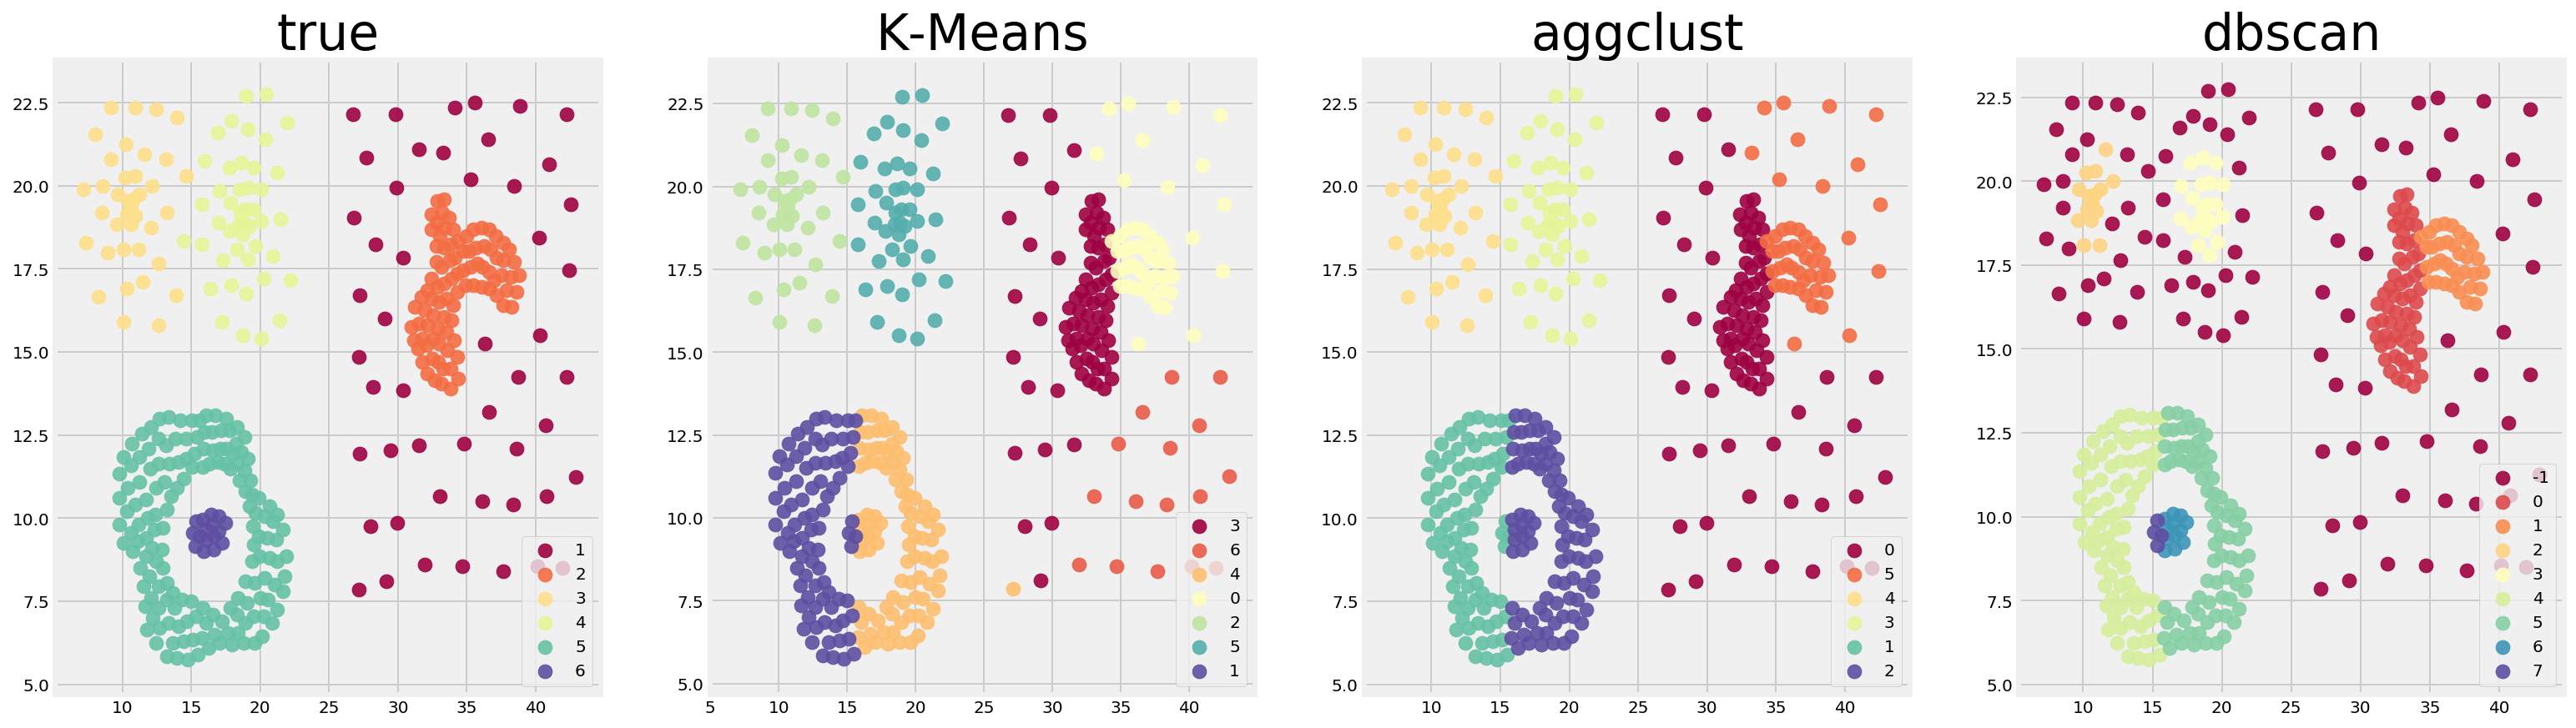

In [13]:
compare_clusters(
    comp,
    n_clusters_kmeans = 7,
    n_clusters_agg = 6,
    eps_dbscan = 1,
    min_samples_dbscan = 4,
    random_state = 42
)
